# Importing data and libraries

In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
from google.colab import drive
drive.mount('/content/drive')
import re
import matplotlib.pyplot as plt
import string

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/TMS_project')

In [ ]:
data = pd.read_csv("mtsamples.csv", encoding= 'utf-8')

# Data exploration

In [ ]:
data.head(5)

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [ ]:
print(f'data shape is: {data.shape}')

data shape is: (4999, 6)


## Finding and removing NaN values

In [ ]:
data.isna().sum()

Unnamed: 0              0
description             0
medical_specialty       0
sample_name             0
transcription          33
keywords             1068
dtype: int64

In [ ]:
print(f"description",data['description'].isna().sum())
print(f"medical_specialty",data['medical_specialty'].isna().sum())
print(f"sample_name",data['sample_name'].isna().sum())
print(f"transcription",data['transcription'].isna().sum())
print(f"keywords",data['keywords'].isna().sum())

description 0
medical_specialty 0
sample_name 0
transcription 33
keywords 1068


In [ ]:
# drop rows that contain NaN values
data = data.dropna()
print(data.shape)

(3898, 6)


## Data distribution and visualization

<Axes: >

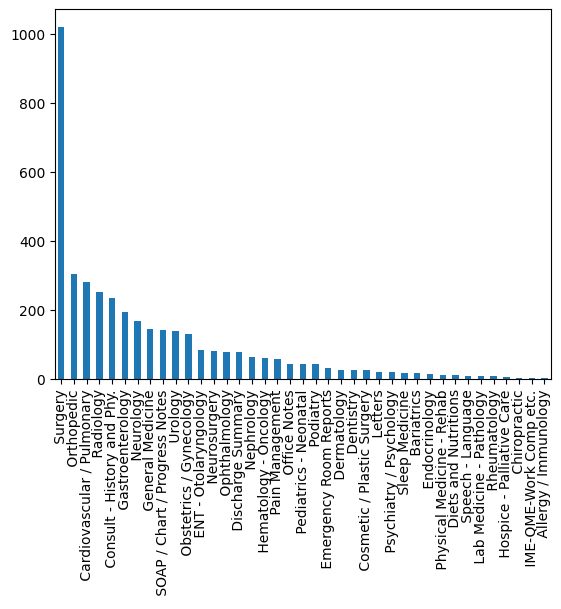

In [ ]:
data['medical_specialty'].value_counts().plot(kind='bar')

Let's consider the top 25 medical specialties with the most representative values within the dataset.

In [ ]:
spec_count=data['medical_specialty'].value_counts()[0:25]
spec_count

 Surgery                          1021
 Orthopedic                        303
 Cardiovascular / Pulmonary        280
 Radiology                         251
 Consult - History and Phy.        234
 Gastroenterology                  195
 Neurology                         168
 General Medicine                  146
 SOAP / Chart / Progress Notes     142
 Urology                           140
 Obstetrics / Gynecology           130
 ENT - Otolaryngology               84
 Neurosurgery                       81
 Ophthalmology                      79
 Discharge Summary                  77
 Nephrology                         63
 Hematology - Oncology              62
 Pain Management                    58
 Office Notes                       44
 Pediatrics - Neonatal              42
 Podiatry                           42
 Emergency Room Reports             31
 Dermatology                        25
 Dentistry                          25
 Cosmetic / Plastic Surgery         25
Name: medical_specialty, 

([<matplotlib.patches.Wedge at 0x7b71700fcee0>,
 [Text(0.7211699963973802, 0.8306105202176306, ' Surgery'),
  Text(-0.4230803744097642, 1.0153831773223811, ' Orthopedic'),
  Text(-0.8502383179230834, 0.6979217740802518, ' Cardiovascular / Pulmonary'),
  Text(-1.0678830364342384, 0.2638670507964023, ' Radiology'),
  Text(-1.085188536154125, -0.1799050888654004, ' Consult - History and Phy.'),
  Text(-0.952474276805872, -0.5502660738434919, ' Gastroenterology'),
  Text(-0.7438665516877143, -0.8103471807072752, ' Neurology'),
  Text(-0.5074236805471667, -0.9759719301393699, ' General Medicine'),
  Text(-0.25938920820162864, -1.06897953145443, ' SOAP / Chart / Progress Notes'),
  Text(-0.0018441279195185877, -1.099998454177194, ' Urology'),
  Text(0.24502977248859162, -1.0723620706618586, ' Obstetrics / Gynecology'),
  Text(0.4324243527551245, -1.0114391623544698, ' ENT - Otolaryngology'),
  Text(0.5677356379326115, -0.9421657207844333, ' Neurosurgery'),
  Text(0.688615627786435, -0.857792

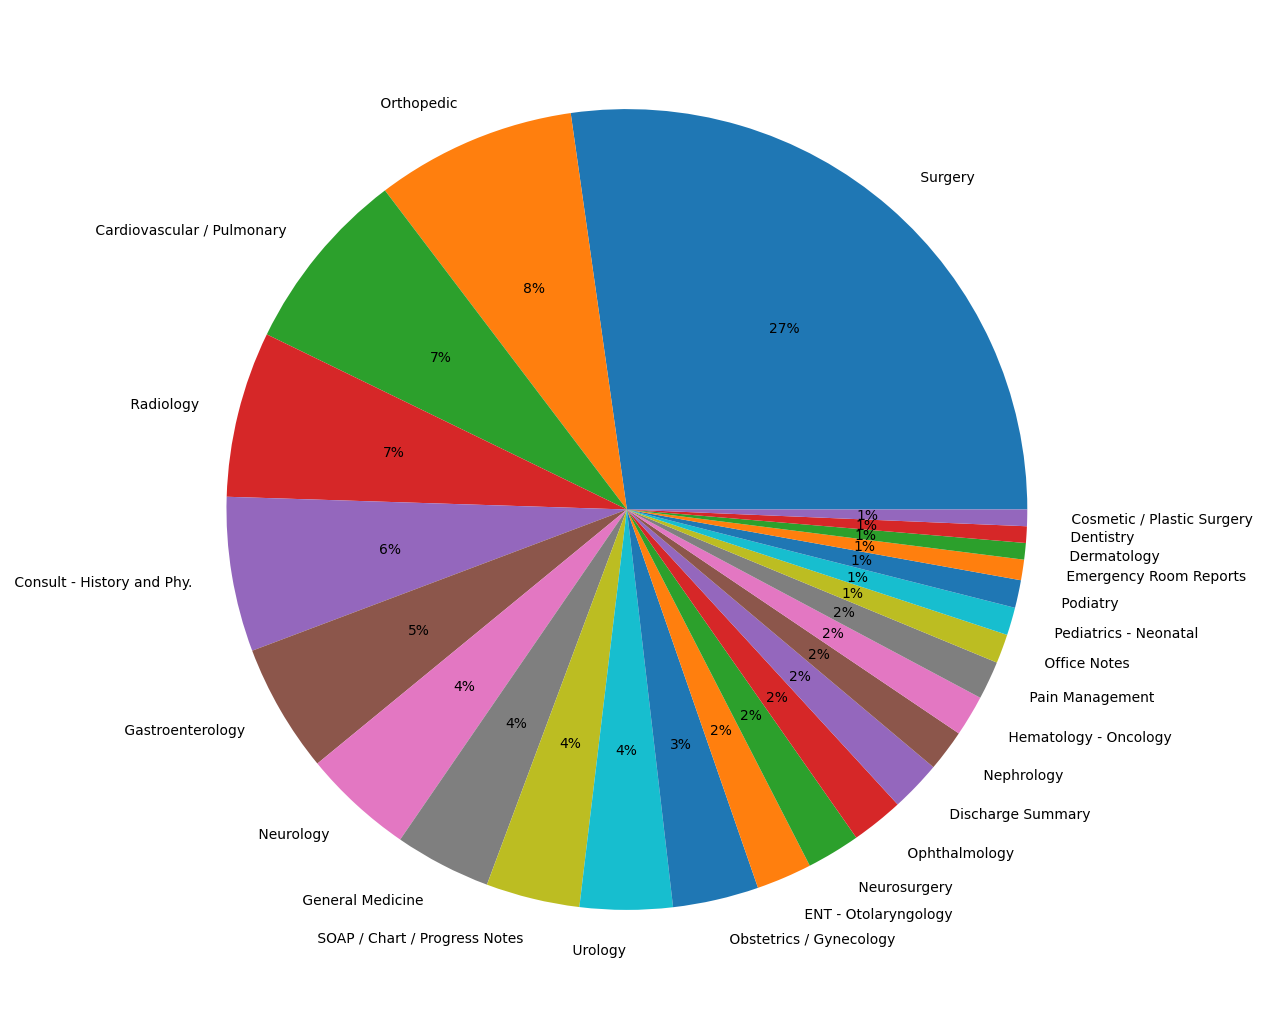

In [ ]:
plt.figure(figsize=(13,13))
# Plotting the pie chart for above dataframe
plt.pie(spec_count,labels=list(spec_count.index),autopct='%1.0f%%')

## Shaping dataset

We select only **medical_specialty** and **transcription** which are the coloumns we are gonna work with.

In [ ]:
data = data[['medical_specialty','transcription']]
data.head()

,medical_specialty,transcription
0,Allergy / Immunology,"SUBJECTIVE:, This 23-year-old white female pr..."
1,Bariatrics,"PAST MEDICAL HISTORY:, He has difficulty climb..."
2,Bariatrics,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ..."
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...


In [ ]:
def shape(data,data_name):
    print(f'STATUS: Dimension of "{data_name}" = {data.shape}')

In [ ]:
df_obj = data.select_dtypes(['object'])
data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())

<ipython-input-14-69d22c186011>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())


We choose to work only on five **medical_specialty**

In [ ]:
data = data[data['medical_specialty'].isin(['Orthopedic', 'Cardiovascular / Pulmonary','Consult - History and Phy.', 'Gastroenterology','Neurology'])]
shape(data,'data')

STATUS: Dimension of "data" = (1180, 2)


In [ ]:
data.head(5)

,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


# Classification pre-processing

## Text pre-processing

Low-casing, remvoing punctuation and numbers

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

def character_repeatation(text):
    # Pattern matching for all case alphabets
    # \1   It refers to the first capturing group.
    # {1,} It means we are matching for repetition that occurs more than one time.
    # r’\1\1' → It limits all the repetition to two characters.
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text)
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    return Combined_Formatted

In [ ]:
display(data.head(5))
data['transcription']= data['transcription'].apply(lambda x: remove_punctuation(x))
data['transcription']= data['transcription'].apply(lambda x: character_repeatation(x))
data['transcription']= data['transcription'].apply(lambda x: x.lower())
data['transcription']= data['transcription'].apply(lambda x: re.sub(r'\d+', '', x))
display(data.head(5))

,medical_specialty,transcription
3,Cardiovascular / Pulmonary,"2-D M-MODE: , ,1. Left atrial enlargement wit..."
4,Cardiovascular / Pulmonary,1. The left ventricular cavity size and wall ...
7,Cardiovascular / Pulmonary,"2-D ECHOCARDIOGRAM,Multiple views of the heart..."
9,Cardiovascular / Pulmonary,"DESCRIPTION:,1. Normal cardiac chambers size...."
11,Cardiovascular / Pulmonary,"2-D STUDY,1. Mild aortic stenosis, widely calc..."


,medical_specialty,transcription
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...


## Tokenezation

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['tokenized_sents'] = data.apply(lambda row: nltk.word_tokenize(str(row['transcription'])), axis=1)

In [ ]:
sents_length = data.apply(lambda row: len(row['tokenized_sents']), axis=1)
sents_length.max()

1835

In [ ]:
data.head()

,medical_specialty,transcription,tokenized_sents
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...,"[d, mmode, left, atrial, enlargement, with, le..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...,"[the, left, ventricular, cavity, size, and, wa..."
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...,"[d, echocardiogrammultiple, views, of, the, he..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, normal, cardiac, chambers, size,..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...,"[d, study, mild, aortic, stenosis, widely, cal..."


## Stop-words removal

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
data['stop_words'] = data['tokenized_sents'].apply(lambda x: ' '.join([word for word in x if word not in (stopwords)]))
data['stop_words'] = data.apply(lambda row: nltk.word_tokenize(str(row['stop_words'])), axis=1)

In [ ]:
data.head()

,medical_specialty,transcription,tokenized_sents,stop_words
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...,"[d, mmode, left, atrial, enlargement, with, le...","[mmode, left, atrial, enlargement, left, atria..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...,"[the, left, ventricular, cavity, size, and, wa...","[left, ventricular, cavity, size, wall, thickn..."
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...,"[d, echocardiogrammultiple, views, of, the, he...","[echocardiogrammultiple, views, heart, great, ..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, normal, cardiac, chambers, size,...","[description, normal, cardiac, chambers, size,..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...,"[d, study, mild, aortic, stenosis, widely, cal...","[study, mild, aortic, stenosis, widely, calcif..."


## Stemming

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize,word_tokenize

ps=PorterStemmer()

In [ ]:
data['stemmed'] = data['stop_words'].apply(lambda x: ' '.join([ps.stem(word) for word in x]))
data['stemmed'] = data.apply(lambda row: nltk.word_tokenize(str(row['stemmed'])), axis=1)

In [ ]:
data.head()

,medical_specialty,transcription,tokenized_sents,stop_words,stemmed
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...,"[d, mmode, left, atrial, enlargement, with, le...","[mmode, left, atrial, enlargement, left, atria...","[mmode, left, atrial, enlarg, left, atrial, di..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...,"[the, left, ventricular, cavity, size, and, wa...","[left, ventricular, cavity, size, wall, thickn...","[left, ventricular, caviti, size, wall, thick,..."
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...,"[d, echocardiogrammultiple, views, of, the, he...","[echocardiogrammultiple, views, heart, great, ...","[echocardiogrammultipl, view, heart, great, ve..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, normal, cardiac, chambers, size,...","[description, normal, cardiac, chambers, size,...","[descript, normal, cardiac, chamber, size, nor..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...,"[d, study, mild, aortic, stenosis, widely, cal...","[study, mild, aortic, stenosis, widely, calcif...","[studi, mild, aortic, stenosi, wide, calcifi, ..."


In [ ]:
total_word_count = data['transcription'].str.split().str.len().sum()
nomalized_word_count = sum(data['stop_words'].apply(len))

In [ ]:
# Printing the values
print(f"Total word count on original data: {total_word_count}")
print(f"Words after data pre-processing: {nomalized_word_count}")
print(f'Rate:',(nomalized_word_count/total_word_count)*100)

Total word count on original data: 483365
Words after data pre-processing: 282204
Rate: 58.38320937593744


# N-gram representations

In [ ]:
from nltk import ngrams

sentence = 'test sentence'
# set n =2 for bi grams
n = 2

bigrams = ngrams(sentence.split(), n)

print(list(bigrams))

[('test', 'sentence')]


In [ ]:
def n_gram(n, data):
    new = data['stemmed'].apply(lambda x: ' '.join(x))
    new = new.str.split().apply(lambda x: list(map(' '.join, ngrams(x, n=n))))
    return new

In [ ]:
data['unigram'] = n_gram(1, data)
data['bigram'] = n_gram(2, data)
data['trigram'] = n_gram(3, data)

In [ ]:
data.head()

,medical_specialty,transcription,tokenized_sents,stop_words,stemmed,unigram,bigram,trigram
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...,"[d, mmode, left, atrial, enlargement, with, le...","[mmode, left, atrial, enlargement, left, atria...","[mmode, left, atrial, enlarg, left, atrial, di...","[mmode, left, atrial, enlarg, left, atrial, di...","[mmode left, left atrial, atrial enlarg, enlar...","[mmode left atrial, left atrial enlarg, atrial..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...,"[the, left, ventricular, cavity, size, and, wa...","[left, ventricular, cavity, size, wall, thickn...","[left, ventricular, caviti, size, wall, thick,...","[left, ventricular, caviti, size, wall, thick,...","[left ventricular, ventricular caviti, caviti ...","[left ventricular caviti, ventricular caviti s..."
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...,"[d, echocardiogrammultiple, views, of, the, he...","[echocardiogrammultiple, views, heart, great, ...","[echocardiogrammultipl, view, heart, great, ve...","[echocardiogrammultipl, view, heart, great, ve...","[echocardiogrammultipl view, view heart, heart...","[echocardiogrammultipl view heart, view heart ..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, normal, cardiac, chambers, size,...","[description, normal, cardiac, chambers, size,...","[descript, normal, cardiac, chamber, size, nor...","[descript, normal, cardiac, chamber, size, nor...","[descript normal, normal cardiac, cardiac cham...","[descript normal cardiac, normal cardiac chamb..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...,"[d, study, mild, aortic, stenosis, widely, cal...","[study, mild, aortic, stenosis, widely, calcif...","[studi, mild, aortic, stenosi, wide, calcifi, ...","[studi, mild, aortic, stenosi, wide, calcifi, ...","[studi mild, mild aortic, aortic stenosi, sten...","[studi mild aortic, mild aortic stenosi, aorti..."


In [ ]:
from wordcloud import WordCloud, ImageColorGenerator

def print_wordCloud(input):
  to_print = [item for sublist in input for item in sublist]
  wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(to_print))
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

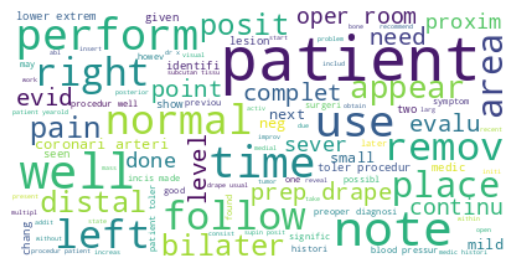

In [ ]:
print_wordCloud(data['unigram'])

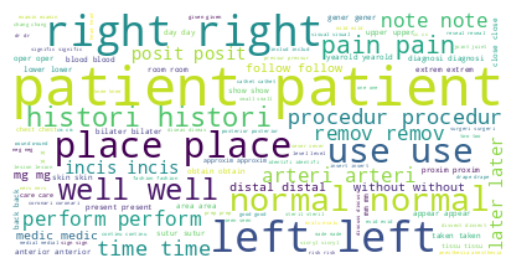

In [ ]:
print_wordCloud(data['bigram'])

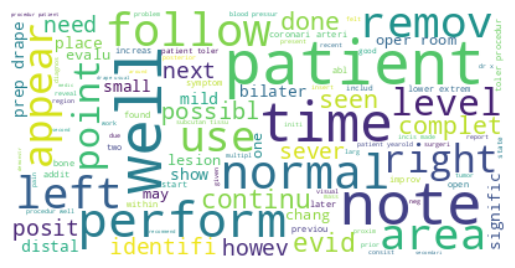

In [ ]:
print_wordCloud(data['trigram'])

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

def print_bar(data, ngram):

  # Initialize dictionaries to store word counts for each medical specialty
  word_counts = {specialty: Counter() for specialty in ['Orthopedic', 'Cardiovascular / Pulmonary', 'Consult - History and Phy.', 'Gastroenterology','Neurology']}

  # Count occurrences of words for each medical specialty
  for index, row in data.iterrows():
      specialty = row['medical_specialty']
      words = row[ngram]
      word_counts[specialty].update(words)

  # Convert dictionaries to DataFrames
  dfs = {specialty: pd.DataFrame(list(count.items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False) for specialty, count in word_counts.items()}

  # Get top 10 most frequent words for each category
  top_words = {specialty: df.head(10) for specialty, df in dfs.items()}

  fig, axes = plt.subplots(3, 2, figsize=(10, 10))

  for i, (specialty, top_words_df) in enumerate(top_words.items()):
      ax = axes[i // 2, i % 2]
      ax.bar(top_words_df['Word'], top_words_df['Count'], color='skyblue')
      ax.set_ylabel('Count')
      ax.set_title(f'Top 10 Words in {specialty}')
      ax.tick_params(axis='x', rotation=45, labelsize=8)
      ax.set_xticklabels(top_words_df['Word'], rotation=45, ha='right', fontsize=8)

  plt.tight_layout()
  plt.show()

<ipython-input-40-785876c3606a>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_words_df['Word'], rotation=45, ha='right', fontsize=8)


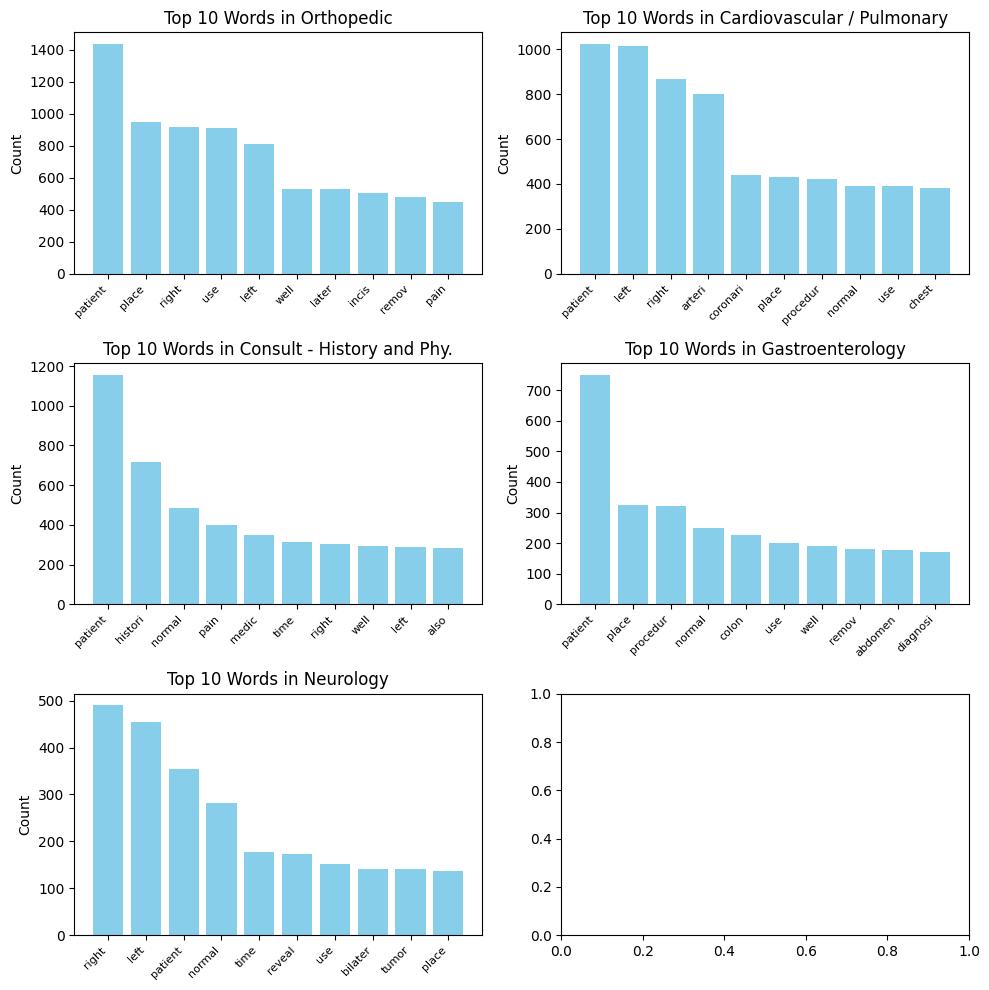

In [ ]:
print_bar(data, 'unigram')

<ipython-input-40-785876c3606a>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_words_df['Word'], rotation=45, ha='right', fontsize=8)


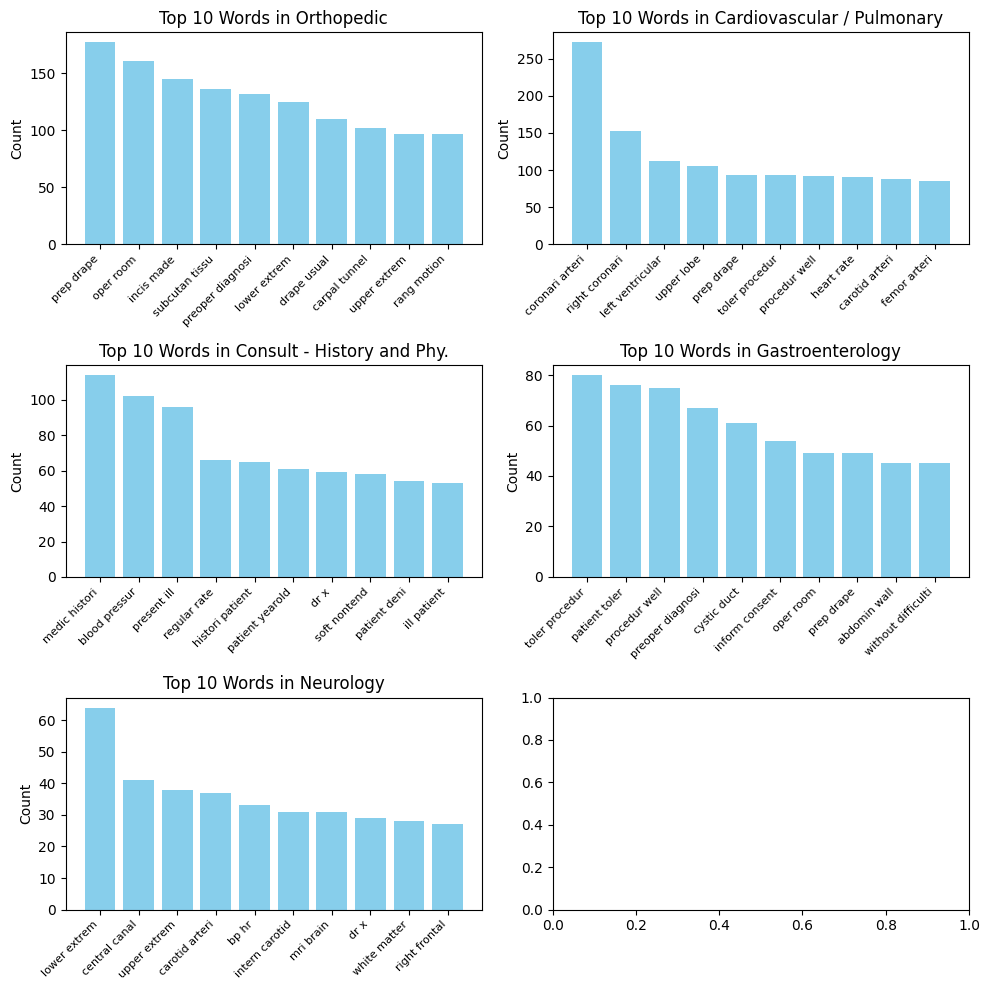

In [ ]:
print_bar(data, 'bigram')

<ipython-input-40-785876c3606a>:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_words_df['Word'], rotation=45, ha='right', fontsize=8)


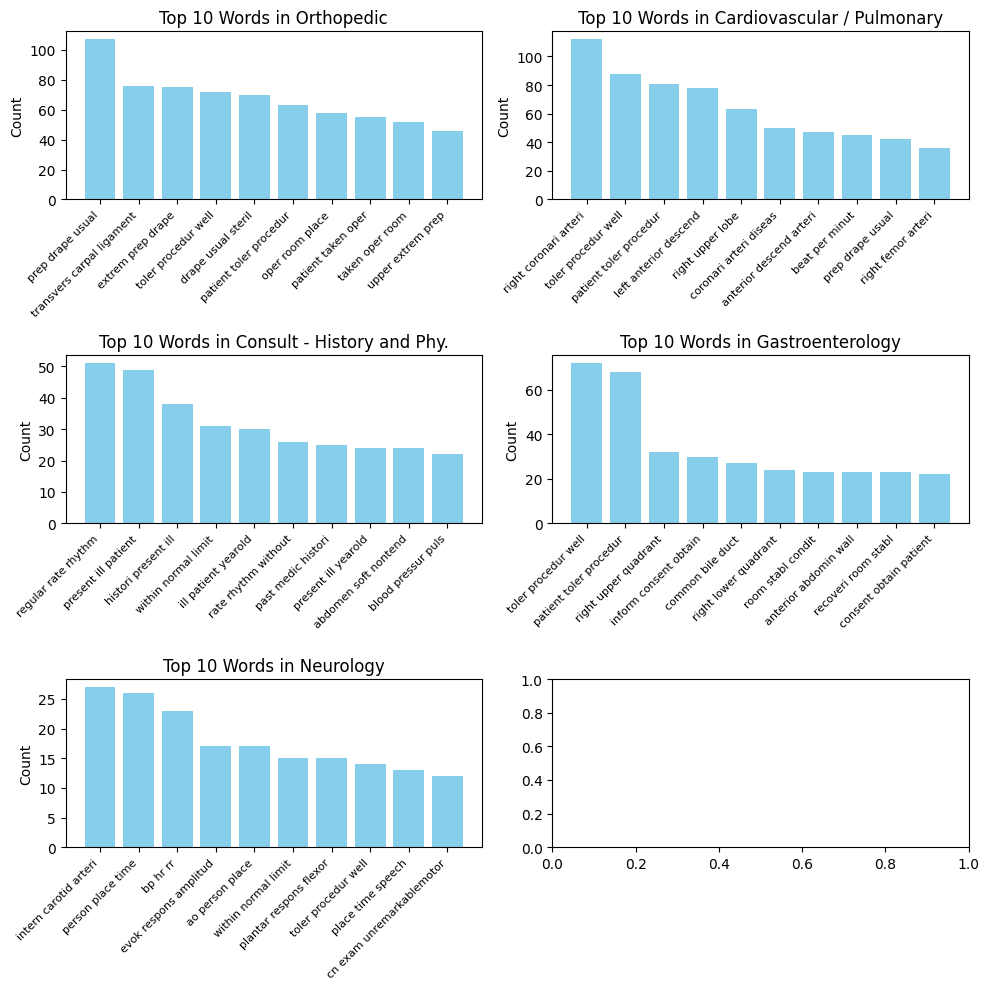

In [ ]:
print_bar(data, 'trigram')

We notice that some words (eg. patient left right) are very frequent, we decided to find so the most **frequent words** and remove them as we did for the sotp words

In [ ]:
from collections import Counter, defaultdict

threshold = 800

def print_frequent_words(list, threshold):

  strings = list.apply(lambda x: ' '.join(x))
  # Create a defaultdict for the word counts
  word_counts = defaultdict(int)
  for string in strings:
    for word in string.split():
      word_counts[word] += 1

  # Create a set of frequent words
  frequent_words = {word for word, count in word_counts.items() if count > threshold}


  return(frequent_words)

In [ ]:
frequent = print_frequent_words(data['stemmed'], threshold)
print(frequent)

{'arteri', 'perform', 'pain', 'right', 'histori', 'remov', 'procedur', 'patient', 'incis', 'place', 'time', 'well', 'use', 'left', 'note', 'posit', 'normal', 'also'}


We make an exception for '**histori**' which can be rappresentative for the **Consult - Historic** category

In [ ]:
frequent.remove('histori')

In [ ]:
data['stemmed'] = data['stemmed'].apply(lambda x: ' '.join([word for word in x if word not in (frequent)]))
data['stemmed'] = data.apply(lambda row: nltk.word_tokenize(str(row['stemmed'])), axis=1)

Rebuild n-grams without frequent words

In [ ]:
data['unigram'] = n_gram(1, data)
data['bigram'] = n_gram(2, data)
data['trigram'] = n_gram(3, data)

In [ ]:
data.head()

,medical_specialty,transcription,tokenized_sents,stop_words,stemmed,unigram,bigram,trigram
3,Cardiovascular / Pulmonary,d mmode left atrial enlargement with left a...,"[d, mmode, left, atrial, enlargement, with, le...","[mmode, left, atrial, enlargement, left, atria...","[mmode, atrial, enlarg, atrial, diamet, cm, si...","[mmode, atrial, enlarg, atrial, diamet, cm, si...","[mmode atrial, atrial enlarg, enlarg atrial, a...","[mmode atrial enlarg, atrial enlarg atrial, en..."
4,Cardiovascular / Pulmonary,the left ventricular cavity size and wall th...,"[the, left, ventricular, cavity, size, and, wa...","[left, ventricular, cavity, size, wall, thickn...","[ventricular, caviti, size, wall, thick, appea...","[ventricular, caviti, size, wall, thick, appea...","[ventricular caviti, caviti size, size wall, w...","[ventricular caviti size, caviti size wall, si..."
7,Cardiovascular / Pulmonary,d echocardiogrammultiple views of the heart an...,"[d, echocardiogrammultiple, views, of, the, he...","[echocardiogrammultiple, views, heart, great, ...","[echocardiogrammultipl, view, heart, great, ve...","[echocardiogrammultipl, view, heart, great, ve...","[echocardiogrammultipl view, view heart, heart...","[echocardiogrammultipl view heart, view heart ..."
9,Cardiovascular / Pulmonary,description normal cardiac chambers size nor...,"[description, normal, cardiac, chambers, size,...","[description, normal, cardiac, chambers, size,...","[descript, cardiac, chamber, size, ventricular...","[descript, cardiac, chamber, size, ventricular...","[descript cardiac, cardiac chamber, chamber si...","[descript cardiac chamber, cardiac chamber siz..."
11,Cardiovascular / Pulmonary,d study mild aortic stenosis widely calcified ...,"[d, study, mild, aortic, stenosis, widely, cal...","[study, mild, aortic, stenosis, widely, calcif...","[studi, mild, aortic, stenosi, wide, calcifi, ...","[studi, mild, aortic, stenosi, wide, calcifi, ...","[studi mild, mild aortic, aortic stenosi, sten...","[studi mild aortic, mild aortic stenosi, aorti..."


## Classification models

## Importing libraries

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
#for model-building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics

### Visualization functions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(
        model, X, y, train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy', cv=5
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)
    val_scores_std = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curves')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color='blue')
    plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                     val_scores_mean + val_scores_std, alpha=0.1, color='orange')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Accuracy')
    plt.plot(train_sizes, val_scores_mean, 'o-', color='orange', label='Validation Accuracy')

    plt.legend()
    plt.grid()
    plt.show()



### Defining dataframe for classification

In [ ]:
data_cl = data[['stemmed', 'medical_specialty']]

In [ ]:
def untokanize(row):
    return ' '.join(row)

# Applying the untokanize function to the specified column
data_cl['stemmed'] = data_cl['stemmed'].apply(untokanize)

<ipython-input-53-e88493ef122f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cl['stemmed'] = data_cl['stemmed'].apply(untokanize)


In [ ]:
data_cl.head()

,stemmed,medical_specialty
3,mmode atrial enlarg atrial diamet cm size vent...,Cardiovascular / Pulmonary
4,ventricular caviti size wall thick appear wall...,Cardiovascular / Pulmonary
7,echocardiogrammultipl view heart great vessel ...,Cardiovascular / Pulmonary
9,descript cardiac chamber size ventricular size...,Cardiovascular / Pulmonary
11,studi mild aortic stenosi wide calcifi minim r...,Cardiovascular / Pulmonary


### Train - Test split

In [ ]:
X = data_cl['stemmed'].values  # List of texts
y = data_cl['medical_specialty'].values  # List of corresponding labels

# 'y' contains labels in string format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Create a dictionary mapping original categories to encoded labels
category_to_label = {category: label for category, label in zip(y, y_encoded)}

# Define a custom mapping for specific labels
custom_labels = {
    0: 'Cardiovascular / Pulmonary',
    1: 'Orthopedic',
    2: 'Neurology',
    3: 'Gastroenterology',
    4: 'Consult - History and Phy.'
}

# Create a dictionary to map encoded labels to custom labels
label_to_custom = {label: custom_labels.get(label, f'Label_{label}') for label in set(y_encoded)}

# Data Split with Original Title Split into training & test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=0)

# Print the mapping of encoded labels to custom labels
for label, custom_label in label_to_custom.items():
    print(f"Label: {label} -> Custom Label: {custom_label}")


Label: 0 -> Custom Label: Cardiovascular / Pulmonary
Label: 1 -> Custom Label: Orthopedic
Label: 2 -> Custom Label: Neurology
Label: 3 -> Custom Label: Gastroenterology
Label: 4 -> Custom Label: Consult - History and Phy.


In [ ]:
print(f"Number of elements in training set: {X_train.size}")
print(f"Number of elements in test set: {X_test.size}")

Number of elements in training set: 944
Number of elements in test set: 236


### Logistic regression using tf-idf

In [ ]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Logistic Regression(tf-idf)
lr_tfidf=LogisticRegression(solver = 'liblinear', C=10, penalty = 'l2')
lr_tfidf.fit(X_train_vectors_tfidf, y_train)
#Predict y value for test dataset
y_predict = lr_tfidf.predict(X_test_vectors_tfidf)
y_prob = lr_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88        57
           1       0.59      0.66      0.62        50
           2       0.97      0.73      0.83        48
           3       0.48      0.44      0.46        32
           4       0.74      0.82      0.78        49

    accuracy                           0.74       236
   macro avg       0.73      0.71      0.71       236
weighted avg       0.75      0.74      0.74       236



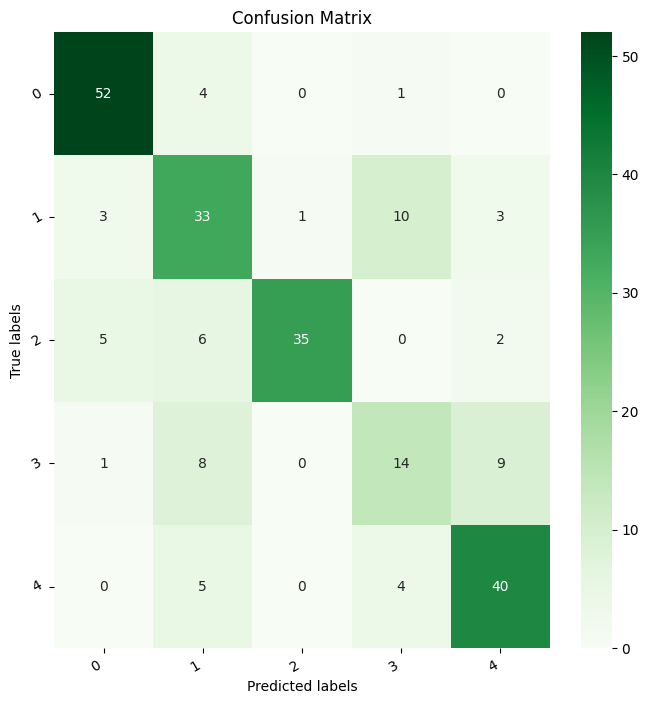

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
from sklearn.metrics import log_loss

# Assuming lr_tfidf is already defined and trained

# Predict probabilities on the training set
train_probs = lr_tfidf.predict_proba(X_train_vectors_tfidf)

# Calculate log loss on the training set
train_loss = log_loss(y_train, train_probs)

# Predict probabilities on the test set
test_probs = lr_tfidf.predict_proba(X_test_vectors_tfidf)

# Calculate log loss on the test set
test_loss = log_loss(y_test, test_probs)

# Print the log loss on train and test sets
print(f"Log Loss on Training Set: {train_loss}")
print(f"Log Loss on Test Set: {test_loss}")

Log Loss on Training Set: 0.21519285174803196
Log Loss on Test Set: 0.6196121916782402


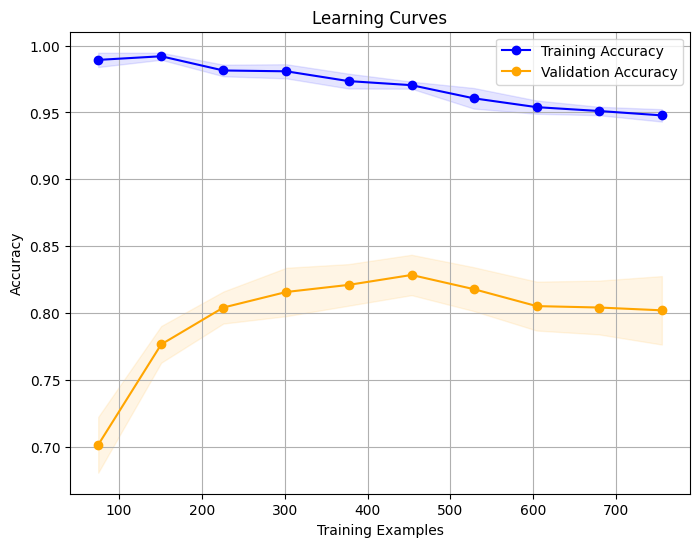

In [ ]:
# Plot learingn curves of Logistic Regression
plot_learning_curves(lr_tfidf, X_train_vectors_tfidf, y_train)

### Naive Bayes Tf-Idf

In [ ]:
#FITTING THE CLASSIFICATION MODEL using Naive Bayes(tf-idf)
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_vectors_tfidf, y_train)
#Predict y value for test dataset
y_predict = nb_tfidf.predict(X_test_vectors_tfidf)
y_prob = nb_tfidf.predict_proba(X_test_vectors_tfidf)[:,1]
print(classification_report(y_test,y_predict))
#print('Confusion Matrix:',confusion_matrix(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        57
           1       0.63      0.78      0.70        50
           2       1.00      0.58      0.74        48
           3       0.75      0.47      0.58        32
           4       0.65      0.92      0.76        49

    accuracy                           0.75       236
   macro avg       0.78      0.72      0.73       236
weighted avg       0.78      0.75      0.74       236



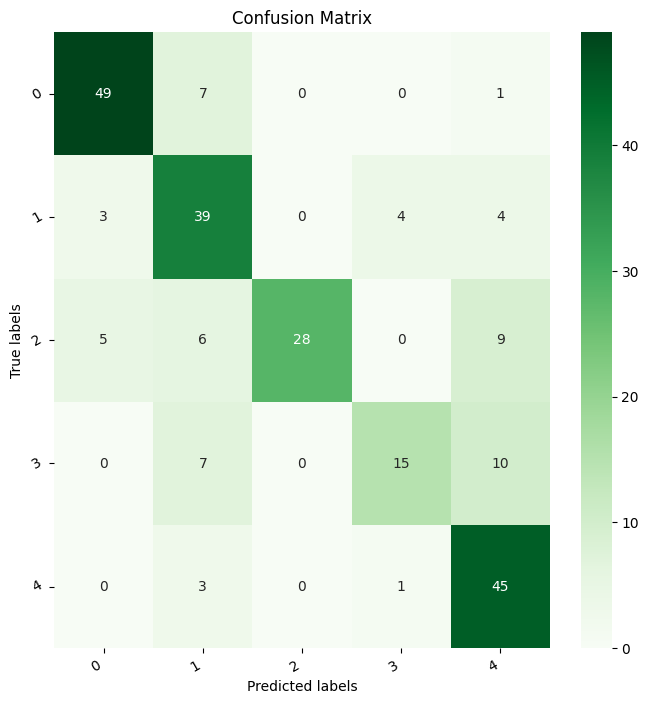

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
cm = metrics.confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

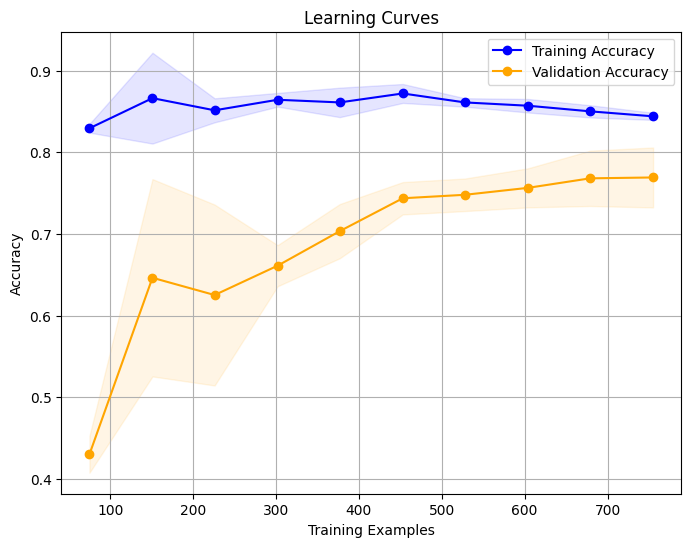

In [ ]:
# Plot learingn curves of Naive Bayes
plot_learning_curves(nb_tfidf, X_train_vectors_tfidf, y_train)

### Random Forest

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline


text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42)), # random state utile per la riproducibilità e la comparabilità dei risultati.
])


text_clf.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report


predictions = text_clf.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


print('\nClassification Report:\n', classification_report(y_test, predictions))

Accuracy: 0.70

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86        57
           1       0.55      0.64      0.59        50
           2       0.97      0.69      0.80        48
           3       0.44      0.38      0.41        32
           4       0.66      0.76      0.70        49

    accuracy                           0.70       236
   macro avg       0.69      0.67      0.67       236
weighted avg       0.71      0.70      0.70       236



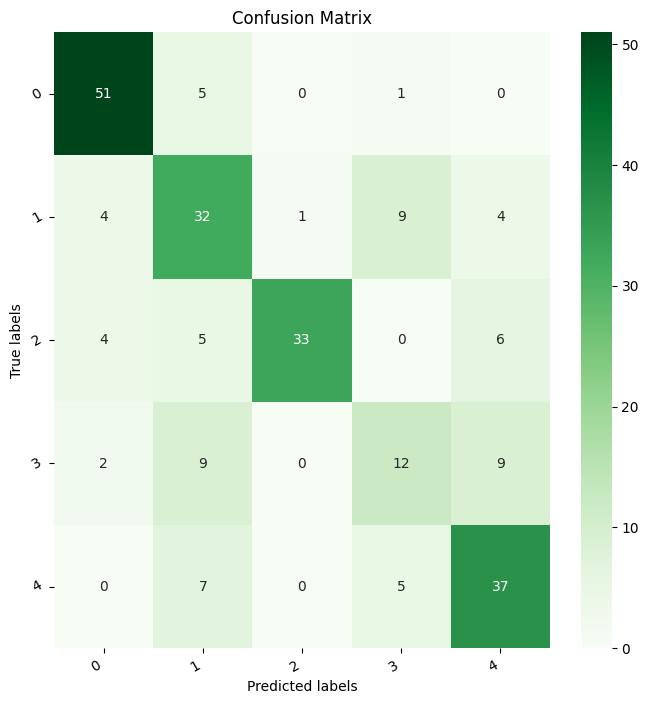

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
ax= fig.add_subplot(1,1,1)
cm = metrics.confusion_matrix(y_test,predictions)
sns.heatmap(cm, annot=True, cmap="Greens",ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
#ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
plt.setp(ax.get_yticklabels(), rotation=30, horizontalalignment='right')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'tfidf__max_features': [1000, 2000, 3000],
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20],
}

# new pipeline with TfidfVectorizer e RandomForestClassifier
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(random_state=42)),
])

#  GridSearchCV
grid_search = GridSearchCV(text_clf, param_grid, cv=5, n_jobs=-1, verbose=1)


grid_search.fit(X_train, y_train)

# Best hyperparameter
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Test Accuracy with Best Model:", test_accuracy)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'clf__max_depth': 20, 'clf__n_estimators': 200, 'tfidf__max_features': 1000}
Best Accuracy: 0.7584768659236744
Test Accuracy with Best Model: 0.711864406779661


### BERT

#### Importing libraries

In [ ]:
pip install transformers

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

#### Creating new dataframe

In [ ]:
df = data[['stemmed', 'medical_specialty']]

In [ ]:
df['stemmed'] = df['stemmed'].apply(untokanize)

<ipython-input-72-e7a15c18cb57>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['stemmed'] = df['stemmed'].apply(untokanize)


In [ ]:
# Creates labels to idetify medical_specialty

possible_labels = df.medical_specialty.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Cardiovascular / Pulmonary': 0,
 'Orthopedic': 1,
 'Neurology': 2,
 'Gastroenterology': 3,
 'Consult - History and Phy.': 4}

In [ ]:
df['label'] = df.medical_specialty.replace(label_dict)

<ipython-input-74-d8b8f68ed321>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df.medical_specialty.replace(label_dict)


#### Train test split of the dataframe

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.index.values,
                                                  df.label.values,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['medical_specialty', 'label', 'data_type']).count()

<ipython-input-75-896e679c01db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_type'] = ['not_set']*df.shape[0]


stemmed
medical_specialty          label data_type         
Cardiovascular / Pulmonary 0     train          224
                                 val             56
Consult - History and Phy. 4     train          187
                                 val             47
Gastroenterology           3     train          156
                                 val             39
Neurology                  2     train          135
                                 val             33
Orthopedic                 1     train          242
                                 val             61

### Model building

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].stemmed.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=512,
    truncation=True,
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].stemmed.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    truncation=True,
    max_length=512,
    return_tensors='pt'
)


input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 8

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5,
                  eps=1e-8)

epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


#### Evaluatin functions

In [ ]:
def single_training_epoch(model, optimizer, train_dataloader):
    model.train()
    # Loop over the training set
    for input_ids, attention_masks, labels in train_dataloader:
        # Clear the gradients
        optimizer.zero_grad()
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, labels=labels)
        loss = outputs[0]
        # Backward pass
        loss.backward()
        optimizer.step()
    return model, optimizer

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def acc_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return accuracy_score(labels_flat, preds_flat)

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [ ]:
from sklearn.metrics import roc_curve

In [ ]:
def evaluate_bert_model_one(preds, labels, model_name="model"):
  y = np.argmax(preds, axis=1).flatten()
  y_pred = labels.flatten()

  print('Validation Set')
  print("Accuracy:", accuracy_score(y, y_pred))
  print()
  print(classification_report(y, y_pred, digits=4))
  cm = confusion_matrix(y, y_pred)
  plt.figure(figsize=(10,10))
  ax = sns.heatmap(cm, annot=True, cmap=plt.cm.Greens, square=True)
  ax.set_xlabel('Predicted label')
  ax.set_ylabel('True label')
  plt.savefig(model_name + "_" + 'validation' + ".eps")
  plt.show()

In [ ]:
# model, optimizer =  single_training_epoch(model, optimizer, dataloader_train)

In [ ]:
# Selecting 'cuda' (GPU) as device tu run the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

print(device)

cuda


#### Training the model over 5 epochs

In [ ]:
import random

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
# Training model

for epoch in tqdm(range(1, epochs+1)):

    model.train()

    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_model{epoch}.pth')


    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    acc = acc_func(predictions,true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')
    tqdm.write(f'Accuracy Score : {acc}')

In [ ]:
model.to(device)

model.load_state_dict(torch.load('data_volume/finetuned_BERT_epoch_model4.pth', map_location=torch.device('cuda')))

_, predictions, true_vals = evaluate(dataloader_validation)
accuracy_per_class(predictions, true_vals)

Class: Cardiovascular / Pulmonary
Accuracy: 53/56

Class: Orthopedic
Accuracy: 56/61

Class: Neurology
Accuracy: 18/33

Class: Gastroenterology
Accuracy: 31/39

Class: Consult - History and Phy.
Accuracy: 38/47



Validation Set
Accuracy: 0.8305084745762712

              precision    recall  f1-score   support

           0     0.9464    0.8030    0.8689        66
           1     0.9180    0.8750    0.8960        64
           2     0.5455    0.7500    0.6316        24
           3     0.7949    0.9688    0.8732        32
           4     0.8085    0.7600    0.7835        50

    accuracy                         0.8305       236
   macro avg     0.8027    0.8314    0.8106       236
weighted avg     0.8482    0.8305    0.8346       236



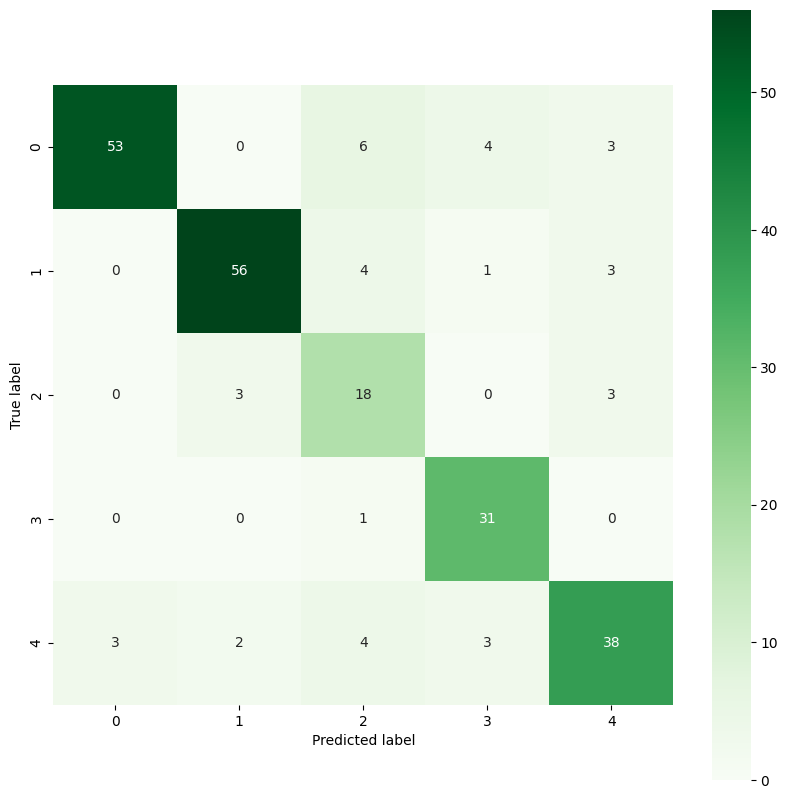

In [ ]:
evaluate_bert_model_one(predictions, true_vals)